# Tarea regresión lógistica


## 1. 
__Implementar (adecuar) los dos métodos descritos en: https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html#id13  Con los datos en el csv de clasificación en teams en la carpeta semana 6. Puede descargar el código también en el github del autor, pero por favor leer primero en su totalidad el contenido en el link de arriba. el github del autor es este: https://github.com/bfortuner/ml-glossary__

### Código preliminar

Primero, se prrocede a importar las librerias a usar a lo largo del proyecto y ademas, se importa el dataset de predicción de aprobar una asignatura dadas las horas en las que un estudiante de dicha asignatura  pasa durmiendo o estudiando.

Importar las librerias que se van a emplear durante la práctica.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importar el dataset que se va a emplear durante la práctica.

In [2]:
data = pd.read_csv("data_classification.csv", sep=';')
print(data.head(10))

     suenio   estudio  pasan
0  4.855064  9.639962      1
1  8.625440  0.058927      0
2  3.828192  0.723199      0
3  7.150955  3.899420      1
4  6.477900  8.198181      1
5  1.922270  1.331427      0
6  8.978216  0.993438      1
7  6.635603  8.542803      1
8  7.672359  5.416400      1
9  4.866015  2.042671      0


### Definición de funciones 

A continuación se presentan las funciones a ser usadas a lo largo del proyecto:

#### Funciones de activación
Definir las funciones de activación, las cuales soportarán el proceso de predicción:

_entradas:_
* z es el valor de una muestra despues de ser operada por los pesos de la función theta. 

_salidas:_
* La probabilidad de la muestras de pertenecer a la clase 1 (pasar la asignatura).

In [3]:

def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z) * (1-sigmoid(z))


#### Función de predicción

La función de predicción predice la probabilidad de un grupo de muestras de pertenecer a la clase 1 (pasar asignatura):

entradas:
* Caracteristicas de la muestra.
* Pesos de la función theta.

salidas:
* La probabilidad de todas las muestras de pertenecer a la clase 1 (pasar la asignatura).

In [4]:
def predict(features, weights):
#producto punto entre las caracteristicas y los pesos
  z = np.dot(features, weights) 
  return sigmoid(z)

#### Función de costo

La función de costo permite determinar que tan preciso es el modelo:

entradas:
* Caracteristicas de las muestras.
* Etiquetas de la clasificación de las muestras.
* Pesos de la función theta.

salidas:
* Costo asociado al modelo.

In [5]:
def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error
    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = -(1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost + class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

#### Función de actualización

La función de actualización de pesos permite determinar nuevos pesos que tengan valores más bajos de costo:

entradas:
* Caracteristicas de las muestras.
* Etiquetas de la clasificación de las muestras.
* Pesos de la función theta.
* tasa de parendizaje

salidas:
* Pesos con menor costo.

In [21]:
def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent
    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)
    
    #print("N es ")
    #print(N)

    #1 - Get Predictions
    predictions = predict(features, weights)
    
    #print("predicciones es ")
    #print(predictions)
    
    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    temporal=predictions - labels
    #print("temporal ")
    #print(temporal)
    transpuesta=features.T
    #print("transpuesta ")
    #print(transpuesta)
    #gradient = np.dot(transpuesta,  temporal)
    gradient = transpuesta.dot(temporal)

    #print("gradiente es ")
    #print(gradient)
    
    #3 Take the average cost derivative for each feature
    gradient /= N

    #print("gradiente es ")
    #print(gradient)
    
    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #print("gradiente es ")
    #print(gradient)
    
    #5 - Subtract from our weights to minimize cost
    res =weights-gradient

    #print("pesos es ")
    #print(res)
    
    return res

#### Función de decisión

La función de decisión de fintera permite determinar si una muestra es 1 (pasa materia) o 0 (pierde asignatura):

entradas:
* Probabilidad de la muestra de pertenecer a la clase 1. 

salidas:
* Categoría a la que pertenece la muestra.

In [7]:
def decision_boundary(prob):
  return 1 if prob >= .5 else 0

#### Función de clasificación

La función de clasificación permite determinar si un grupo de muestras pertenecen a la categoria 1 (pasa materia) o 0 (pierde asignatura):

entradas:
* Predicciones de las muestras realizadas por el modelo.

salidas:
* Categorías a las que pertenecen las muestras.

In [8]:
def classify(predictions):
  
  res=[]
  for i in predictions:
    res.append(decision_boundary(i))

  return res

#### Función de entrenamiento

La función de entrenamiento, como su nombre lo indica, permite entrenar el modelo dadas las muestras de entrada:

entradas:
* Caracteristicas de las muestras.
* Etiquetas de la clasificación de las muestras.
* Pesos de la función theta.
* tasa de parendizaje.
* Número de iteraciones del entrenamiento. 

salidas:
* Pesos resultantes del entrenamiento 
* costo asociado al modelo

In [9]:
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

#### Función de exactitud

La función de exactitud, como su nombre lo indica, permite determinar la exactitud del modelo comparando las etiquetas predichas contra las etiquetas reales de las muestras:

entradas:
* Etiquetas predichas por el modelo. 
* Etiquetas reales de las muestras.

salidas:
* Exactitud del modelo

In [10]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

#### Función de gráficos de frontera

La función de gráficas de frontera permiten crear un gráfico donde se observa las predicciones de cada etiqueta.  

entradas:
* Predicciones de las muestras con la etiqueta 1. 
* Predicciones de las muestras clasificadas con la etiqueta 0.

salidas:
*  Gráfico de las muestras  

In [11]:
def plot_decision_boundary(trues, falses):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()

### Implementación

Dadas las funciones definidas, se procede a desarrollar la predicción del dataset propuesto mediante la regresión lógistica.

train
plot
accuracy
clasify


iter: 0 cost: 26.474020874695697
iter: 10 cost: 13.57169976267585
iter: 20 cost: inf
iter: 30 cost: inf
iter: 40 cost: 4.18288651182346
iter: 50 cost: 3.208107976959734
iter: 60 cost: 2.256466564774155
iter: 70 cost: 1.3695167952101301
Los pesos del modelo entrenado son: 
suenio     0.426702
estudio   -0.256584
dtype: float64
La exactitud del modelo es:
0.6699999999999999


C:\Users\Guatavita\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


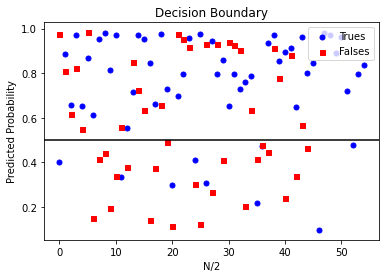

In [22]:
#constantes utiles
lr=0.1
iteraciones=80
#estructuras utiles
labels=data["pasan"]
caracteristicas=data.iloc[:, 0:2]
pesos=[1,-10] #pesos dummy
#entrenamiento del modelo
pesos, cost=train(caracteristicas, labels, pesos, lr, iteraciones)
print("Los pesos del modelo entrenado son: ")
print(pesos)
#Implementación del modelo
predicciones=predict(caracteristicas, pesos)
etiquetasPred=classify(predicciones)
#obtener exactitud del modelo
exac=accuracy(etiquetasPred, labels)
print("La exactitud del modelo es:")
print(exac)
#Grafica
trues=[]
falses=[]
for e, p in zip(labels, predicciones):
    if(e==1):
        trues.append(p)
    else:
        falses.append(p)
        
plot_decision_boundary(trues, falses)

gráfica funcion de costo

## 2.

__Correr el ejemplo multiclase al final de:​ •https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html__

In [15]:
import sklearn
from sklearn.linear_model import LogisticRegression


features_train=caracteristicas
labels_train=labels

# Scikit Logistic Regression
scikit_log_reg = LogisticRegression()
clf=scikit_log_reg.fit(features_train,labels_train)
pesos=clf.coef_

#Score is Mean Accuracy
scikit_score = clf.score(caracteristicas,labels)
print ('Scikit score: ', scikit_score)
print ('pesos: ', pesos)



Scikit score:  0.89
pesos:  [[1.40295843 1.17387611]]


## 3.
__Encontrar la derivada de J para un theta cualquiera de la Regresión Logística. Usarla para confirmar las ecuaciones de descenso del gradiente en las presentaciones use los links de ayuda en la presentación.__

A continuación se presentan las expresiones a operar:

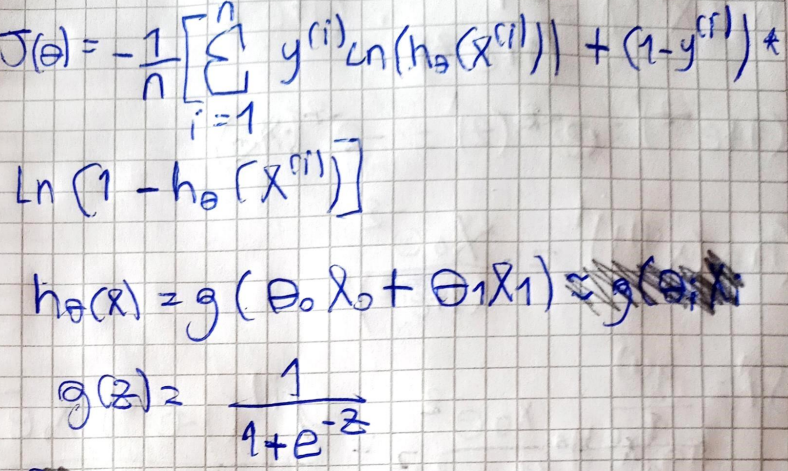

Dado que la expresión es igual para theta 0 y theta 1, se decide derivar en función de theta 0. La expresión de la derivada es igual a:


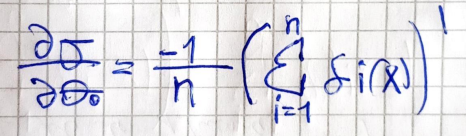

La derivada de la expresión completa es la derivada de la función dentro de la sumatoria.

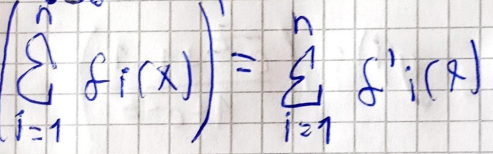

In [ ]:
Se procede a derivar cada una de las expresiones que componen a la función fi.

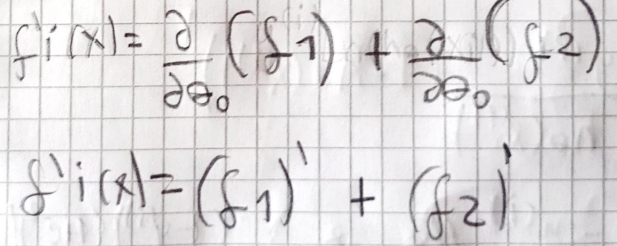

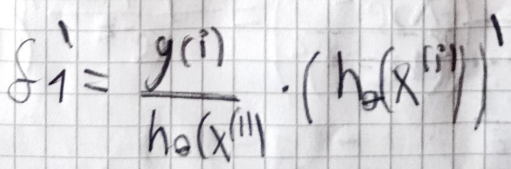

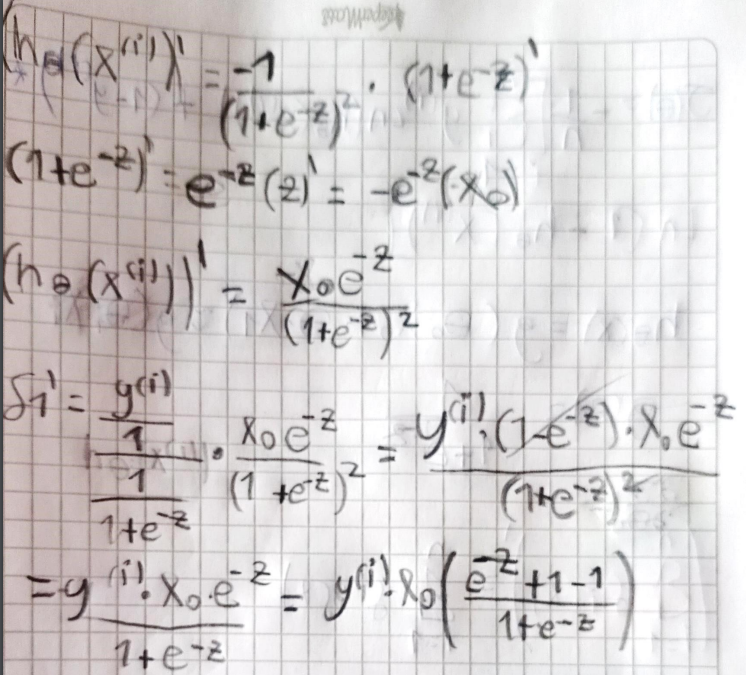

El resultado del primer componente es:

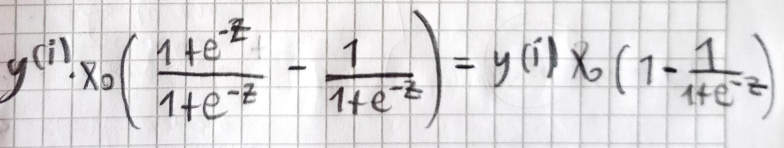

El resultado del segundo componente es:

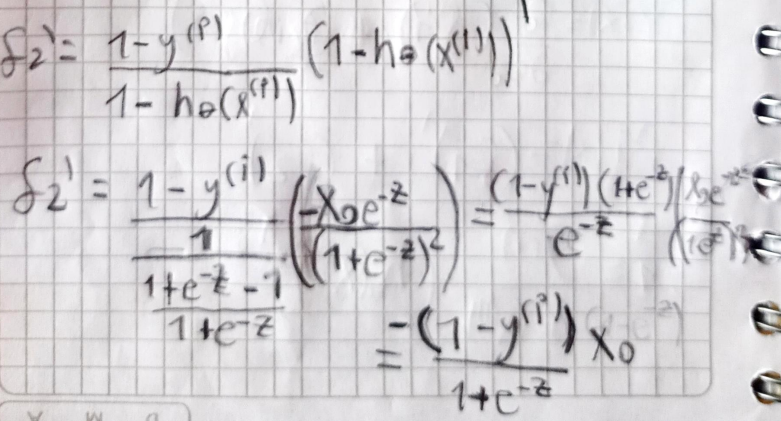

Se suman los resultados de ambas componentes y se despeja.

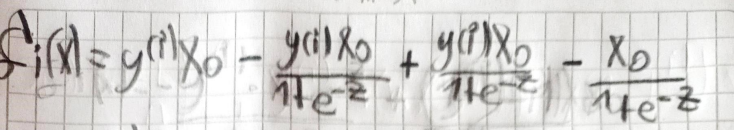

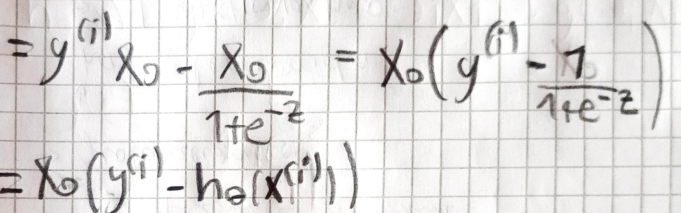

Finalmente se agrega la sumatoria y la expresión se multiplica por las constantes. De forma que el resultado es igual a :

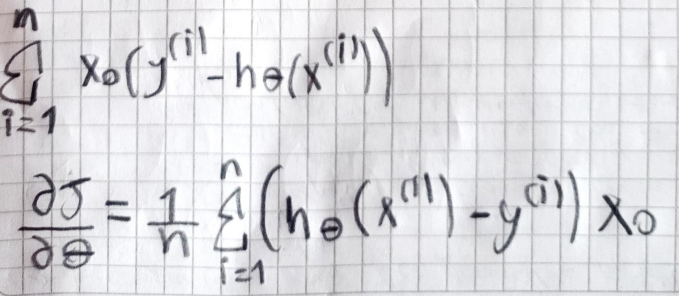

## Conclusiones

La regresión logística es una técnica sencilla y elegante de clasificación binaria. La transición “suave” de la función sigmoide es mucho más útil que trazar una frontera estática sobre las muestras. Contar con valores de probabilidad asociados a la clasificación de las muestras cuenta con potenciales veneficios. 
La principal debilidad que tiene esta técnica es su rigidez. Cuando el dominio del problema es demasiado complejo, puede ser complicado adecuar el método para solucionar dicho problema. Cuando existen grupos de clasificación donde las fronteras entre estos son bastante difusas o tienen comportamiento no lineal.
La implementación de los métodos vistos en clase como herramienta educativa, es útil para entender los mecanismos detrás de las técnicas, comprender a fondo como la información es tratada e interpretada por estas. Aun así, resaltar que la mayoría de los métodos se encuentran implementados en librerías de acceso público y el tiempo necesario para analizar e implementar dichas técnicas puede ser significativo para el desarrollo de un proyecto. 
